In [3]:
import pandas as pd
redfin=pd.read_csv('redfin.csv')

In [4]:
tem=redfin['Month of Period End'].str.split(' ',n=1,expand=True)
redfin[['month']]=tem[[0]]
redfin[['year']]=tem[[1]]

In [6]:
look_up = {'January': '01', 'February':'02','March':'03', 'April':'04',  'May':'05',
           'June':'06', 'July':'07', 'August':'08',  'September':'09', 'October':'10','November':'11',  'December':'12'}
redfin['month_num']=redfin['month'].apply(lambda x:look_up[x])
redfin.head(3)

,Unnamed: 0,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,...,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY,month,year,month_num
0,0,January 2012,502500.0,0.142045,0.116667,16,-0.058824,0.333333,20,1.000000,...,-0.551724,51.5,-31.5,-14.0,1.001107,-0.00624,-0.016556,January,2012,01
1,1,February 2012,509500.0,0.013930,0.151412,18,0.125000,-0.100000,22,0.100000,...,-0.657895,39.0,-12.5,-37.0,1.004417,0.00331,0.042326,February,2012,02
2,2,March 2012,480000.0,-0.057900,0.103448,21,0.166667,-0.045455,29,0.318182,...,-0.700000,30.0,-9.0,-22.5,0.999647,-0.00477,0.027171,March,2012,03


In [7]:
redfin1=redfin.groupby(['year','month_num']).agg({'Median Sale Price':'mean','Homes Sold':'mean','New Listings':'mean','Inventory':'mean','Days on Market':'mean'}).reset_index()
redfin1.head()

,year,month_num,Median Sale Price,Homes Sold,New Listings,Inventory,Days on Market
0,2012,01,707604.166667,51.958333,42.583333,37.666667,39.104167
1,2012,02,721609.229167,48.708333,54.291667,38.416667,44.812500
2,2012,03,709479.166667,50.541667,74.000000,38.125000,38.020833
3,2012,04,738333.312500,61.041667,78.333333,39.791667,28.416667
4,2012,05,754114.583333,67.375000,81.666667,37.250000,23.291667


In [8]:
redfin1["period"] = redfin1["year"].map(str) + ','+redfin1["month_num"]
redfin1.head()

,year,month_num,Median Sale Price,Homes Sold,New Listings,Inventory,Days on Market,period
0,2012,01,707604.166667,51.958333,42.583333,37.666667,39.104167,"2012,01"
1,2012,02,721609.229167,48.708333,54.291667,38.416667,44.812500,"2012,02"
2,2012,03,709479.166667,50.541667,74.000000,38.125000,38.020833,"2012,03"
3,2012,04,738333.312500,61.041667,78.333333,39.791667,28.416667,"2012,04"
4,2012,05,754114.583333,67.375000,81.666667,37.250000,23.291667,"2012,05"


In [9]:
redfin2=redfin1.copy()
redfin2=redfin2.groupby('year').agg({'Homes Sold':'sum'}).reset_index()
redfin2.head()

,year,Homes Sold
0,2012,761.166667
1,2013,795.208333
2,2014,746.708333
3,2015,693.916667
4,2016,663.333333


In [10]:
%load_ext rpy2.ipython
%R library(ggplot2)

array(['ggplot2', 'tools', 'stats', 'graphics', 'grDevices', 'utils',
       'datasets', 'methods', 'base'], dtype='<U9')

In [11]:
%R -i redfin1

In [12]:
%R -i redfin2

### Trend of median price with time

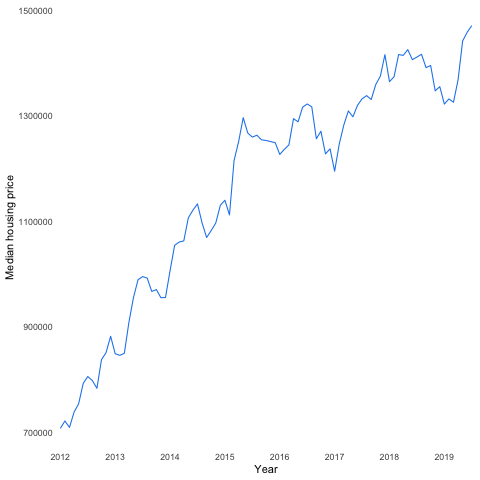

In [13]:
%%R
ggplot()+geom_line(aes(x=period,y=Median.Sale.Price),group=1,data=redfin1,color='dodgerblue2')+theme_minimal()+theme(panel.grid = element_blank())+
ylab('Median housing price')+xlab('Year')+scale_x_discrete(breaks=c('2012,01','2013,01','2014,01','2015,01','2016,01','2017,01','2018,01','2019,01'),labels=c('2012','2013','2014','2015','2016','2017','2018','2019'))

### Trend of home sold with time

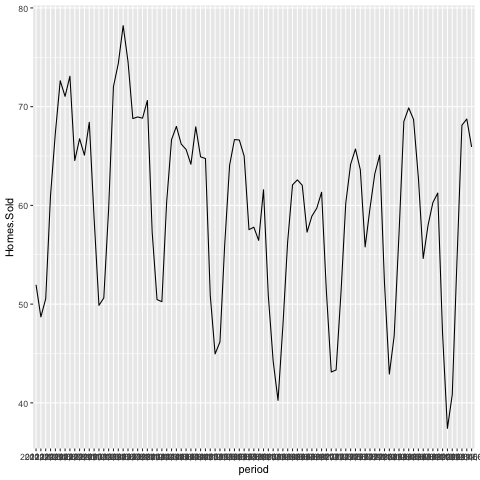

In [14]:
%%R
ggplot()+geom_line(aes(x=period,y=Homes.Sold),data=redfin1,group=1)

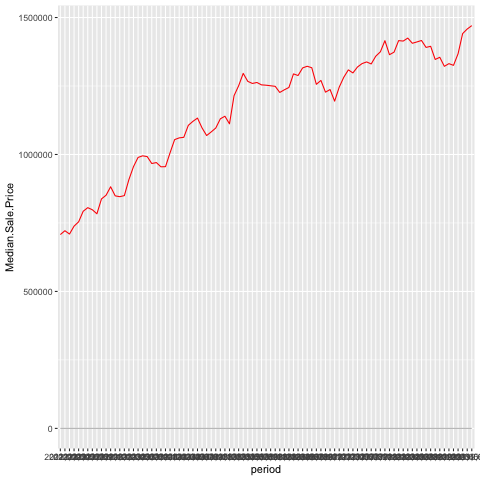

In [16]:
%%R
ggplot(aes(x=period),data=redfin1)+geom_line(aes(y=Median.Sale.Price),group=1,color='red')+
geom_line(aes(y=Homes.Sold),group=1,color='grey')

### Trend of new listing with time

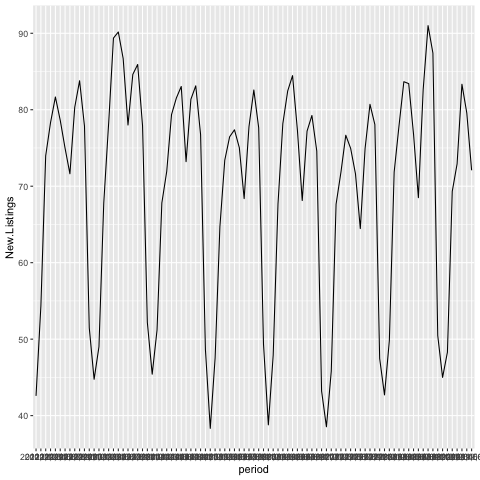

In [17]:
%%R
ggplot()+geom_line(aes(x=period,y=New.Listings),data=redfin1,group=1)
# ggsave('New listing.pdf')

### Trend of inventory with time

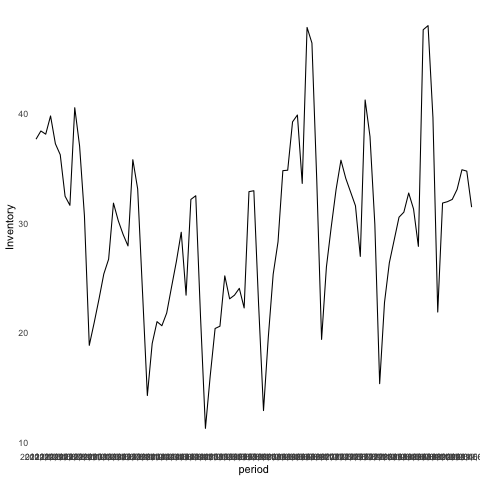

In [18]:
%%R
ggplot()+geom_line(aes(x=period,y=Inventory),data=redfin1,group=1)+theme_minimal()+theme(panel.grid = element_blank())
# ggsave('inventory.pdf')

### Trend of days.on.Market with time

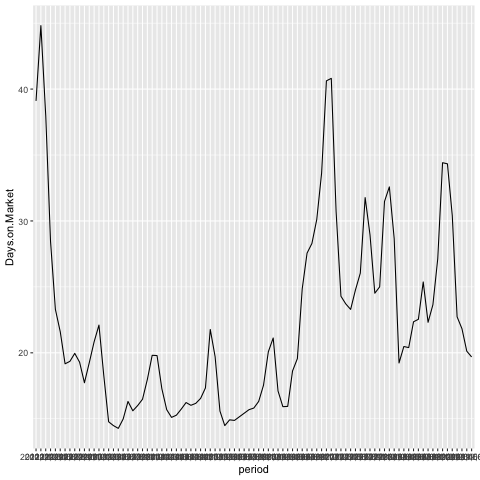

In [19]:
%%R
ggplot()+geom_line(aes(x=period,y=Days.on.Market),data=redfin1,group=1)

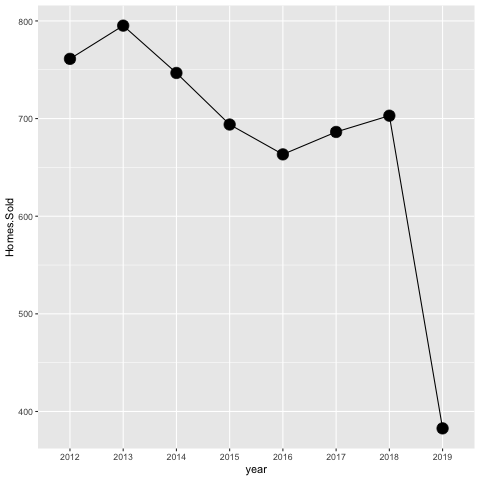

In [20]:
%%R
ggplot()+geom_line(group=1,data=redfin2,aes(x=year,y=Homes.Sold))+geom_point(data=redfin2,aes(x=year,y=Homes.Sold),size=5)
# ggsave('Home sold annual.pdf')

In [21]:
townhouse=pd.read_excel('/Users/cjq/Documents/EDA project/ca_townhouse.xlsx')
townhouse.to_csv('townhouse.csv',encoding='utf-8')
townhouse=pd.read_csv('townhouse.csv')

In [22]:
townhouse.head()

,Unnamed: 0,Region,Month of Period End,Median Sale Price
0,0,Zip Code: 94102,December 2012,680500.0
1,1,Zip Code: 94102,January 2013,776000.0
2,2,Zip Code: 94102,February 2013,680500.0
3,3,Zip Code: 94102,March 2013,1040000.0
4,4,Zip Code: 94102,April 2013,863840.0


In [23]:
townhouse=townhouse.groupby('Month of Period End').agg({'Median Sale Price':'mean'}).reset_index()
townhouse.head()

,Month of Period End,Median Sale Price
0,April 2012,9.901084e+05
1,April 2013,1.197686e+06
2,April 2014,1.368679e+06
3,April 2015,1.576833e+06
4,April 2016,1.521332e+06


In [24]:
tem=townhouse['Month of Period End'].str.split(' ',n=1,expand=True)
townhouse['year']=tem[1]
townhouse['month']=tem[0]
townhouse.head()

,Month of Period End,Median Sale Price,year,month
0,April 2012,9.901084e+05,2012,April
1,April 2013,1.197686e+06,2013,April
2,April 2014,1.368679e+06,2014,April
3,April 2015,1.576833e+06,2015,April
4,April 2016,1.521332e+06,2016,April


In [25]:
look_up = {'January': '01', 'February':'02','March':'03', 'April':'04',  'May':'05',
           'June':'06', 'July':'07', 'August':'08',  'September':'09', 'October':'10','November':'11',  'December':'12'}
townhouse['month_num']=townhouse['month'].apply(lambda x:look_up[x])
townhouse.head()

,Month of Period End,Median Sale Price,year,month,month_num
0,April 2012,9.901084e+05,2012,April,04
1,April 2013,1.197686e+06,2013,April,04
2,April 2014,1.368679e+06,2014,April,04
3,April 2015,1.576833e+06,2015,April,04
4,April 2016,1.521332e+06,2016,April,04


In [26]:
townhouse=townhouse.sort_values(by=['year','month_num'])
townhouse.drop(columns=['Month of Period End','month'])
# townhouse["period"] = townhouse["year"].map(str) + ','+townhouse["month_num"]
townhouse.head()

,Month of Period End,Median Sale Price,year,month,month_num
30,January 2012,804078.846154,2012,January,01
22,February 2012,846294.615385,2012,February,02
54,March 2012,962795.666667,2012,March,03
0,April 2012,990108.437500,2012,April,04
62,May 2012,874920.937500,2012,May,05


In [27]:
townhouse["period"] = townhouse["year"].map(str) + ','+townhouse["month_num"]
townhouse.head()

,Month of Period End,Median Sale Price,year,month,month_num,period
30,January 2012,804078.846154,2012,January,01,"2012,01"
22,February 2012,846294.615385,2012,February,02,"2012,02"
54,March 2012,962795.666667,2012,March,03,"2012,03"
0,April 2012,990108.437500,2012,April,04,"2012,04"
62,May 2012,874920.937500,2012,May,05,"2012,05"


In [28]:
%R -i townhouse

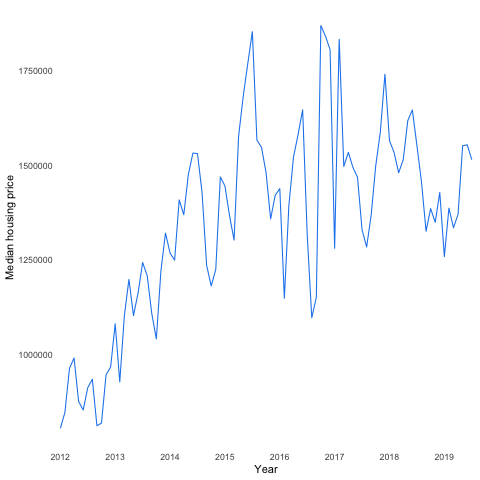

In [29]:
%%R
ggplot()+geom_line(aes(x=period,y=Median.Sale.Price),group=1,data=townhouse,color='dodgerblue2')+theme_minimal()+theme(panel.grid = element_blank())+
ylab('Median housing price')+xlab('Year')+scale_x_discrete(breaks=c('2012,01','2013,01','2014,01','2015,01','2016,01','2017,01','2018,01','2019,01'),labels=c('2012','2013','2014','2015','2016','2017','2018','2019'))

In [30]:
condo=pd.read_excel('/Users/cjq/Documents/EDA project/Condo housing.xlsx')
condo=condo.to_csv('condo.csv',encoding='utf-8')
condo=pd.read_csv('condo.csv')
condo.head()

,Unnamed: 0,Region,Month of Period End,Median Sale Price
0,0,Zip Code: 94102,January 2012,502500.0
1,1,Zip Code: 94102,February 2012,509500.0
2,2,Zip Code: 94102,March 2012,439500.0
3,3,Zip Code: 94102,April 2012,450000.0
4,4,Zip Code: 94102,May 2012,550000.0


In [31]:
tem=condo['Month of Period End'].str.split(' ',n=1,expand=True)
condo['year']=tem[1]
condo['month']=tem[0]
condo.head()

,Unnamed: 0,Region,Month of Period End,Median Sale Price,year,month
0,0,Zip Code: 94102,January 2012,502500.0,2012,January
1,1,Zip Code: 94102,February 2012,509500.0,2012,February
2,2,Zip Code: 94102,March 2012,439500.0,2012,March
3,3,Zip Code: 94102,April 2012,450000.0,2012,April
4,4,Zip Code: 94102,May 2012,550000.0,2012,May


In [32]:
look_up = {'January': '01', 'February':'02','March':'03', 'April':'04',  'May':'05',
           'June':'06', 'July':'07', 'August':'08',  'September':'09', 'October':'10','November':'11',  'December':'12'}
condo['month_num']=condo['month'].apply(lambda x:look_up[x])
condo.head()

,Unnamed: 0,Region,Month of Period End,Median Sale Price,year,month,month_num
0,0,Zip Code: 94102,January 2012,502500.0,2012,January,01
1,1,Zip Code: 94102,February 2012,509500.0,2012,February,02
2,2,Zip Code: 94102,March 2012,439500.0,2012,March,03
3,3,Zip Code: 94102,April 2012,450000.0,2012,April,04
4,4,Zip Code: 94102,May 2012,550000.0,2012,May,05


In [33]:
condo=condo.groupby('Month of Period End').agg({'Median Sale Price':'mean'}).reset_index()

In [34]:
tem=condo['Month of Period End'].str.split(' ',n=1,expand=True)
condo['year']=tem[1]
condo['month']=tem[0]
condo.head()

,Month of Period End,Median Sale Price,year,month
0,April 2012,6.062285e+05,2012,April
1,April 2013,7.147345e+05,2013,April
2,April 2014,8.547200e+05,2014,April
3,April 2015,1.070990e+06,2015,April
4,April 2016,1.069402e+06,2016,April


In [35]:
look_up = {'January': '01', 'February':'02','March':'03', 'April':'04',  'May':'05',
           'June':'06', 'July':'07', 'August':'08',  'September':'09', 'October':'10','November':'11',  'December':'12'}
condo['month_num']=condo['month'].apply(lambda x:look_up[x])
condo.head()

,Month of Period End,Median Sale Price,year,month,month_num
0,April 2012,6.062285e+05,2012,April,04
1,April 2013,7.147345e+05,2013,April,04
2,April 2014,8.547200e+05,2014,April,04
3,April 2015,1.070990e+06,2015,April,04
4,April 2016,1.069402e+06,2016,April,04


In [36]:
condo=condo.sort_values(by=['year','month_num'])

In [37]:
condo["period"] = condo["year"].map(str) + ','+condo["month_num"]
condo.head()

,Month of Period End,Median Sale Price,year,month,month_num,period
30,January 2012,557028.125000,2012,January,01,"2012,01"
22,February 2012,570192.416667,2012,February,02,"2012,02"
54,March 2012,575000.000000,2012,March,03,"2012,03"
0,April 2012,606228.520833,2012,April,04,"2012,04"
62,May 2012,602810.000000,2012,May,05,"2012,05"


In [38]:
%R -i condo

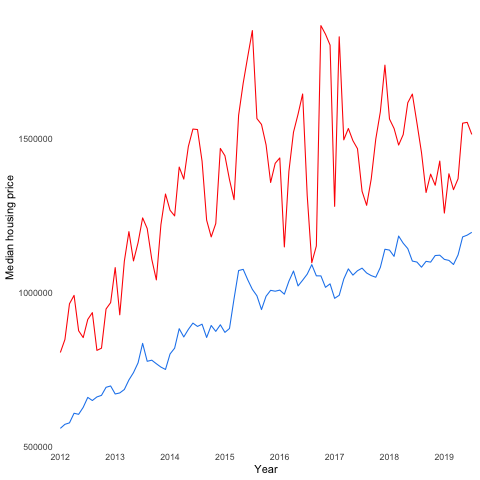

In [39]:
%%R
ggplot()+geom_line(aes(x=period,y=Median.Sale.Price),group=1,data=condo,color='dodgerblue2')+
geom_line(aes(x=period,y=Median.Sale.Price),group=1,data=townhouse,color='red')+
theme_minimal()+theme(panel.grid = element_blank())+
ylab('Median housing price')+xlab('Year')+scale_x_discrete(breaks=c('2012,01','2013,01','2014,01','2015,01','2016,01','2017,01','2018,01','2019,01'),labels=c('2012','2013','2014','2015','2016','2017','2018','2019'))

In [40]:
single=pd.read_excel('/Users/cjq/Documents/EDA project/single family housing.xlsx')
single.to_csv('single.csv',encoding='utf-8')
single=pd.read_csv('single.csv')
single.head()

,Unnamed: 0,Region,Month of Period End,Median Sale Price
0,0,Zip Code: 94102,October 2012,1380000.0
1,1,Zip Code: 94102,November 2012,1380000.0
2,2,Zip Code: 94102,December 2012,1940000.0
3,3,Zip Code: 94102,January 2013,2500000.0
4,4,Zip Code: 94102,May 2013,3365500.0


In [41]:
single=single.groupby('Month of Period End').agg({'Median Sale Price':'mean'}).reset_index()

In [42]:
tem=single['Month of Period End'].str.split(' ',n=1,expand=True)
single['year']=tem[1]
single['month']=tem[0]
single.head()

,Month of Period End,Median Sale Price,year,month
0,April 2012,1.182200e+06,2012,April
1,April 2013,1.919862e+06,2013,April
2,April 2014,1.797798e+06,2014,April
3,April 2015,1.934888e+06,2015,April
4,April 2016,1.795681e+06,2016,April


In [45]:
single['month_num']=single['month'].apply(lambda x:look_up[x])
single=single.sort_values(by=['year','month_num'])
single["period"] = single["year"].map(str) + ','+single["month_num"]

In [46]:
%R -i single

In [47]:
%R library(grid)

array(['grid', 'ggplot2', 'tools', 'stats', 'graphics', 'grDevices',
       'utils', 'datasets', 'methods', 'base'], dtype='<U9')

### Trend of median house price of three different types of houses in SF with time

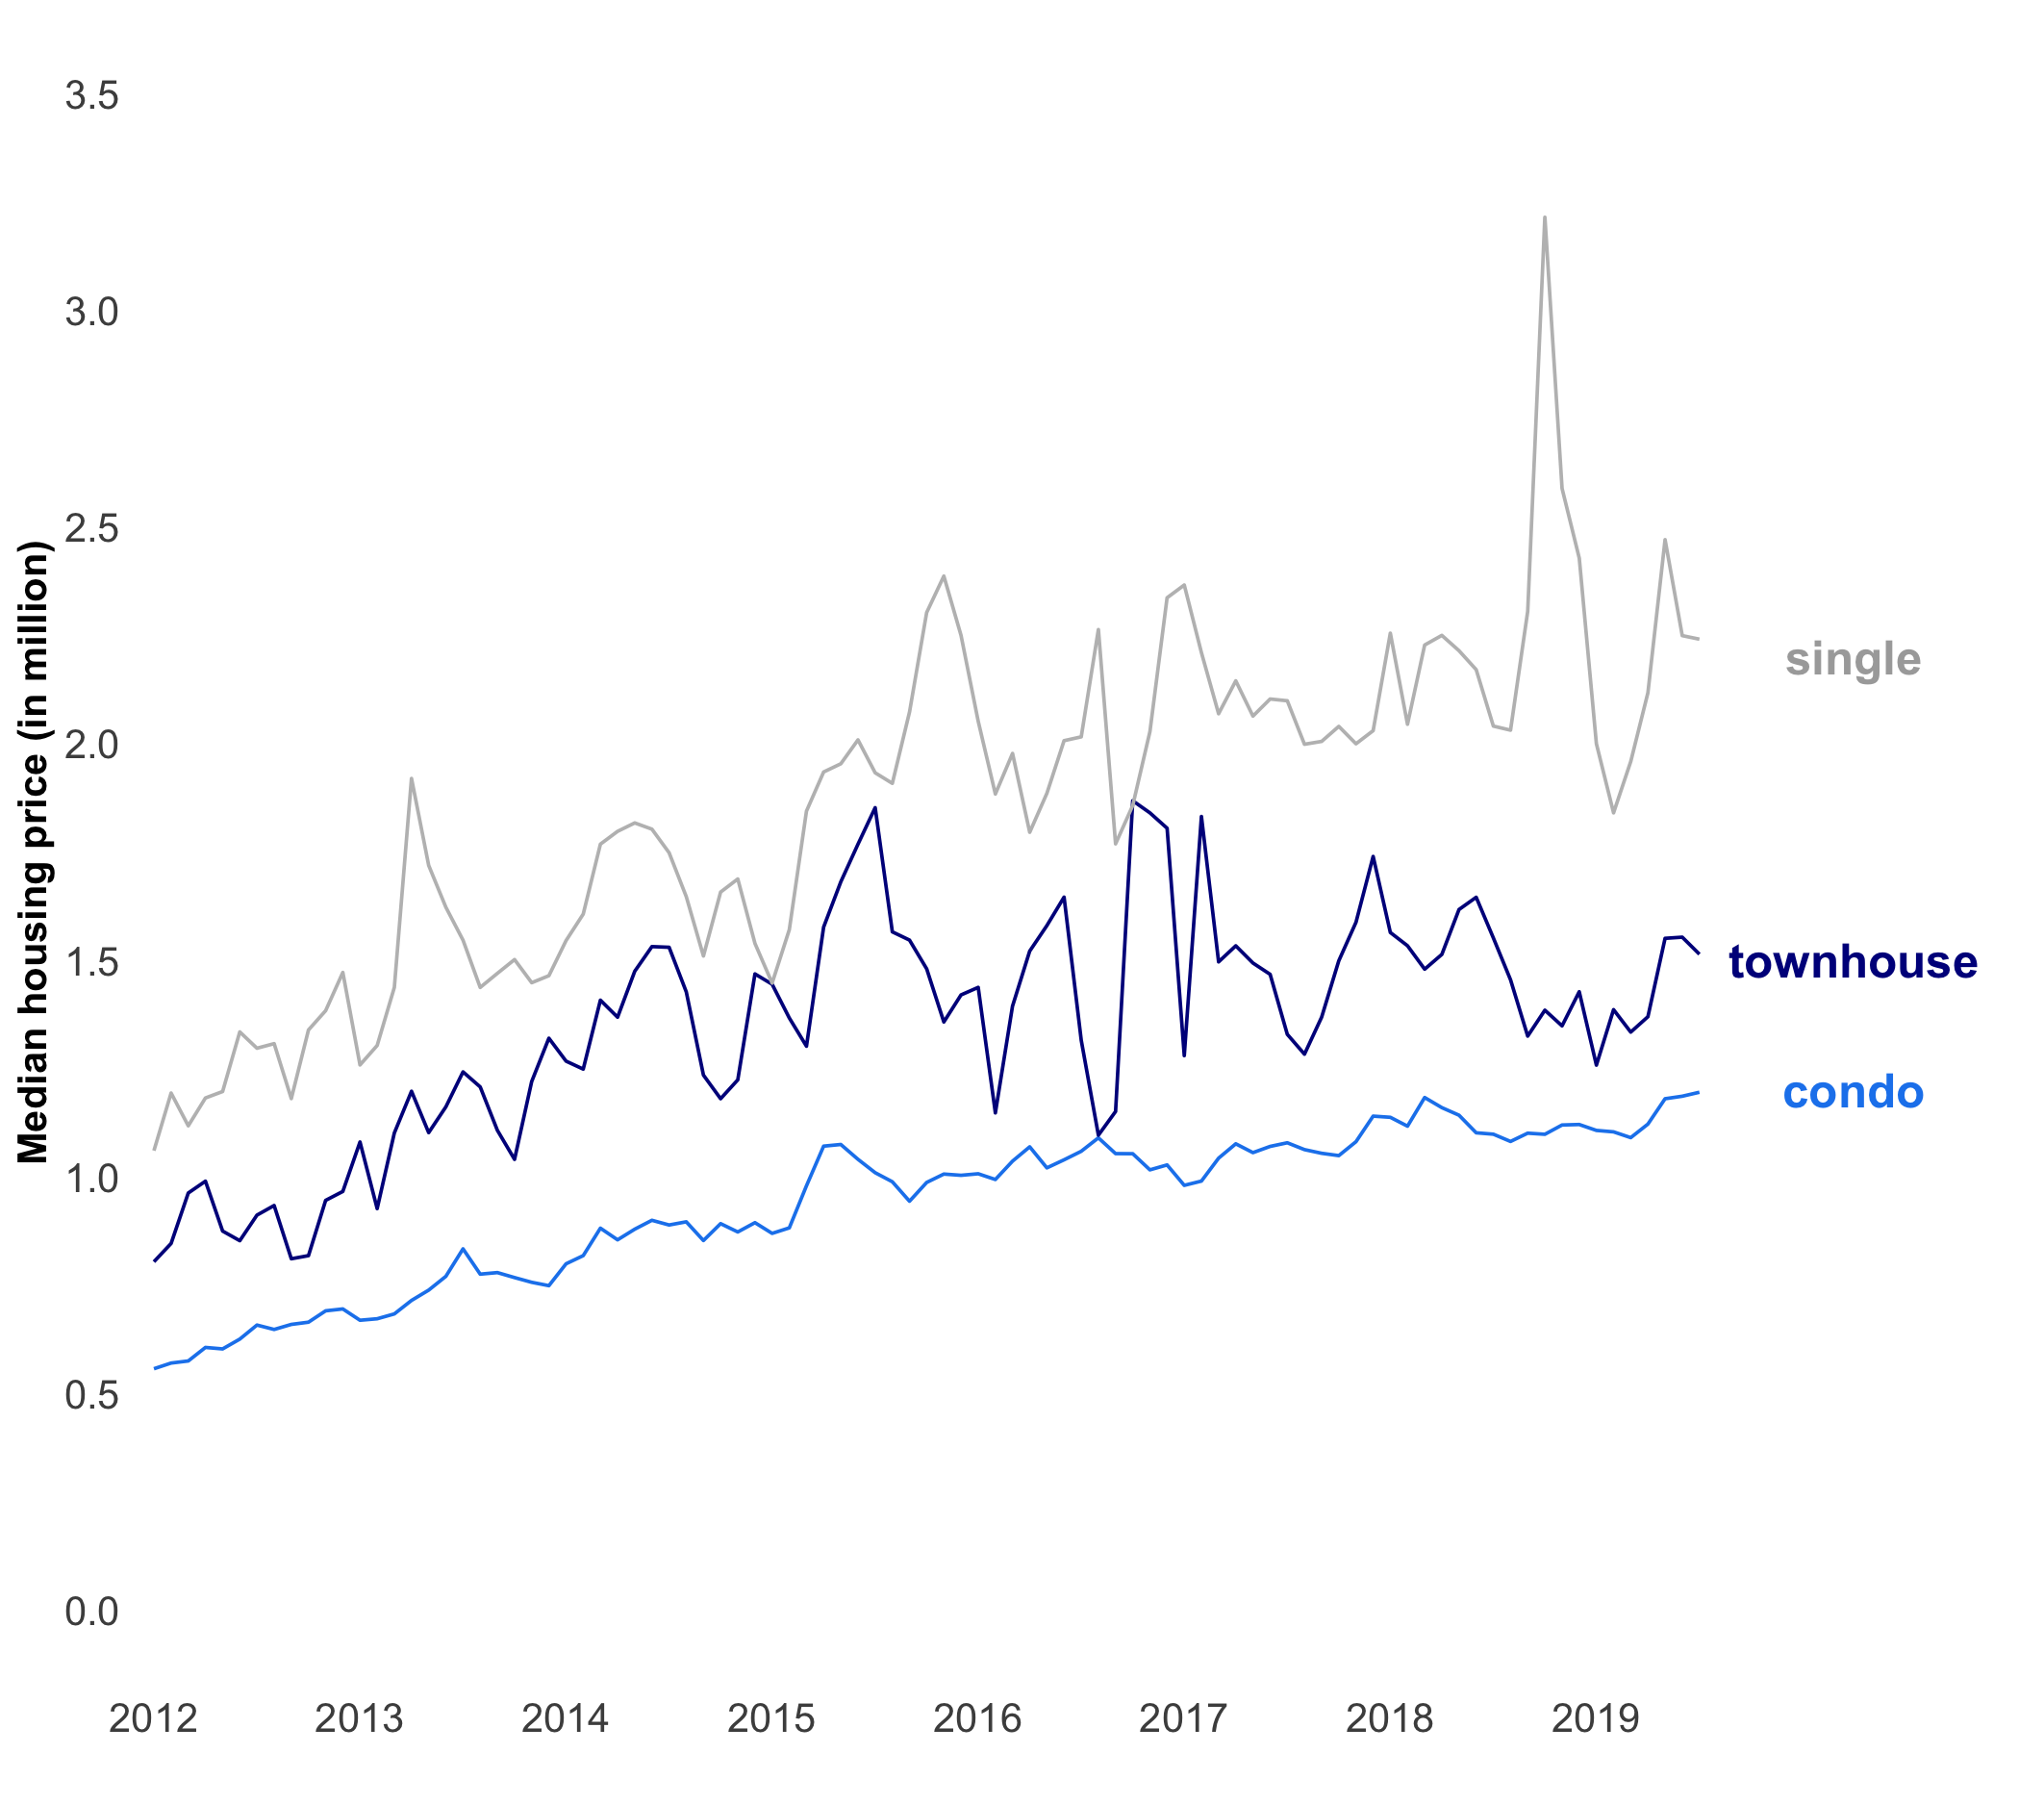

In [48]:
%%R -w 8.5 -h 7.5 --units in -r 250
# grid.text("20", x = unit(0.91, "npc"), y = unit(0.80, "npc"))
ggplot()+geom_line(aes(x=period,y=Median.Sale.Price/1000000),group=1,data=condo,color='dodgerblue2')+
geom_line(aes(x=period,y=Median.Sale.Price/1000000),group=1,data=townhouse,color='blue4')+
geom_line(aes(x=period,y=Median.Sale.Price/1000000),group=1,data=single,color='grey')+
theme_minimal()+theme(panel.grid = element_blank())+
ylab('Median housing price (in million)')+xlab('')+
scale_x_discrete(breaks=c('2012,01','2013,01','2014,01','2015,01','2016,01','2017,01','2018,01','2019,01'),labels=c('2012','2013','2014','2015','2016','2017','2018','2019'))+
scale_y_continuous(limits=c(0,3.5),breaks=seq(0,3.5,0.5))+
theme(axis.title=element_text(size=12,face="bold"),axis.text=element_text(size=12),panel.grid = element_blank(),panel.background = element_blank())+
expand_limits(x=c(0,110))+
geom_text(aes(x=100,y=1.2),label='condo',color='dodgerblue2',fontface='bold',size=5)+
geom_text(aes(x=100,y=1.5),label='townhouse',color='blue4',fontface='bold',size=5)+
geom_text(aes(x=100,y=2.2),label='single',color='darkgrey',fontface='bold',size=5)


# ggsave('graph1.jpg')

In [50]:
graph2=redfin1.groupby('year').agg({'Homes Sold':'mean','New Listings':'mean'}).reset_index()
graph2['change']=graph2['Homes Sold']-graph2['New Listings']
graph2['year']=graph2['year'].astype('str')

In [51]:
%R -i graph2

### Trend of new listing, house of sold and inventory in SF with time

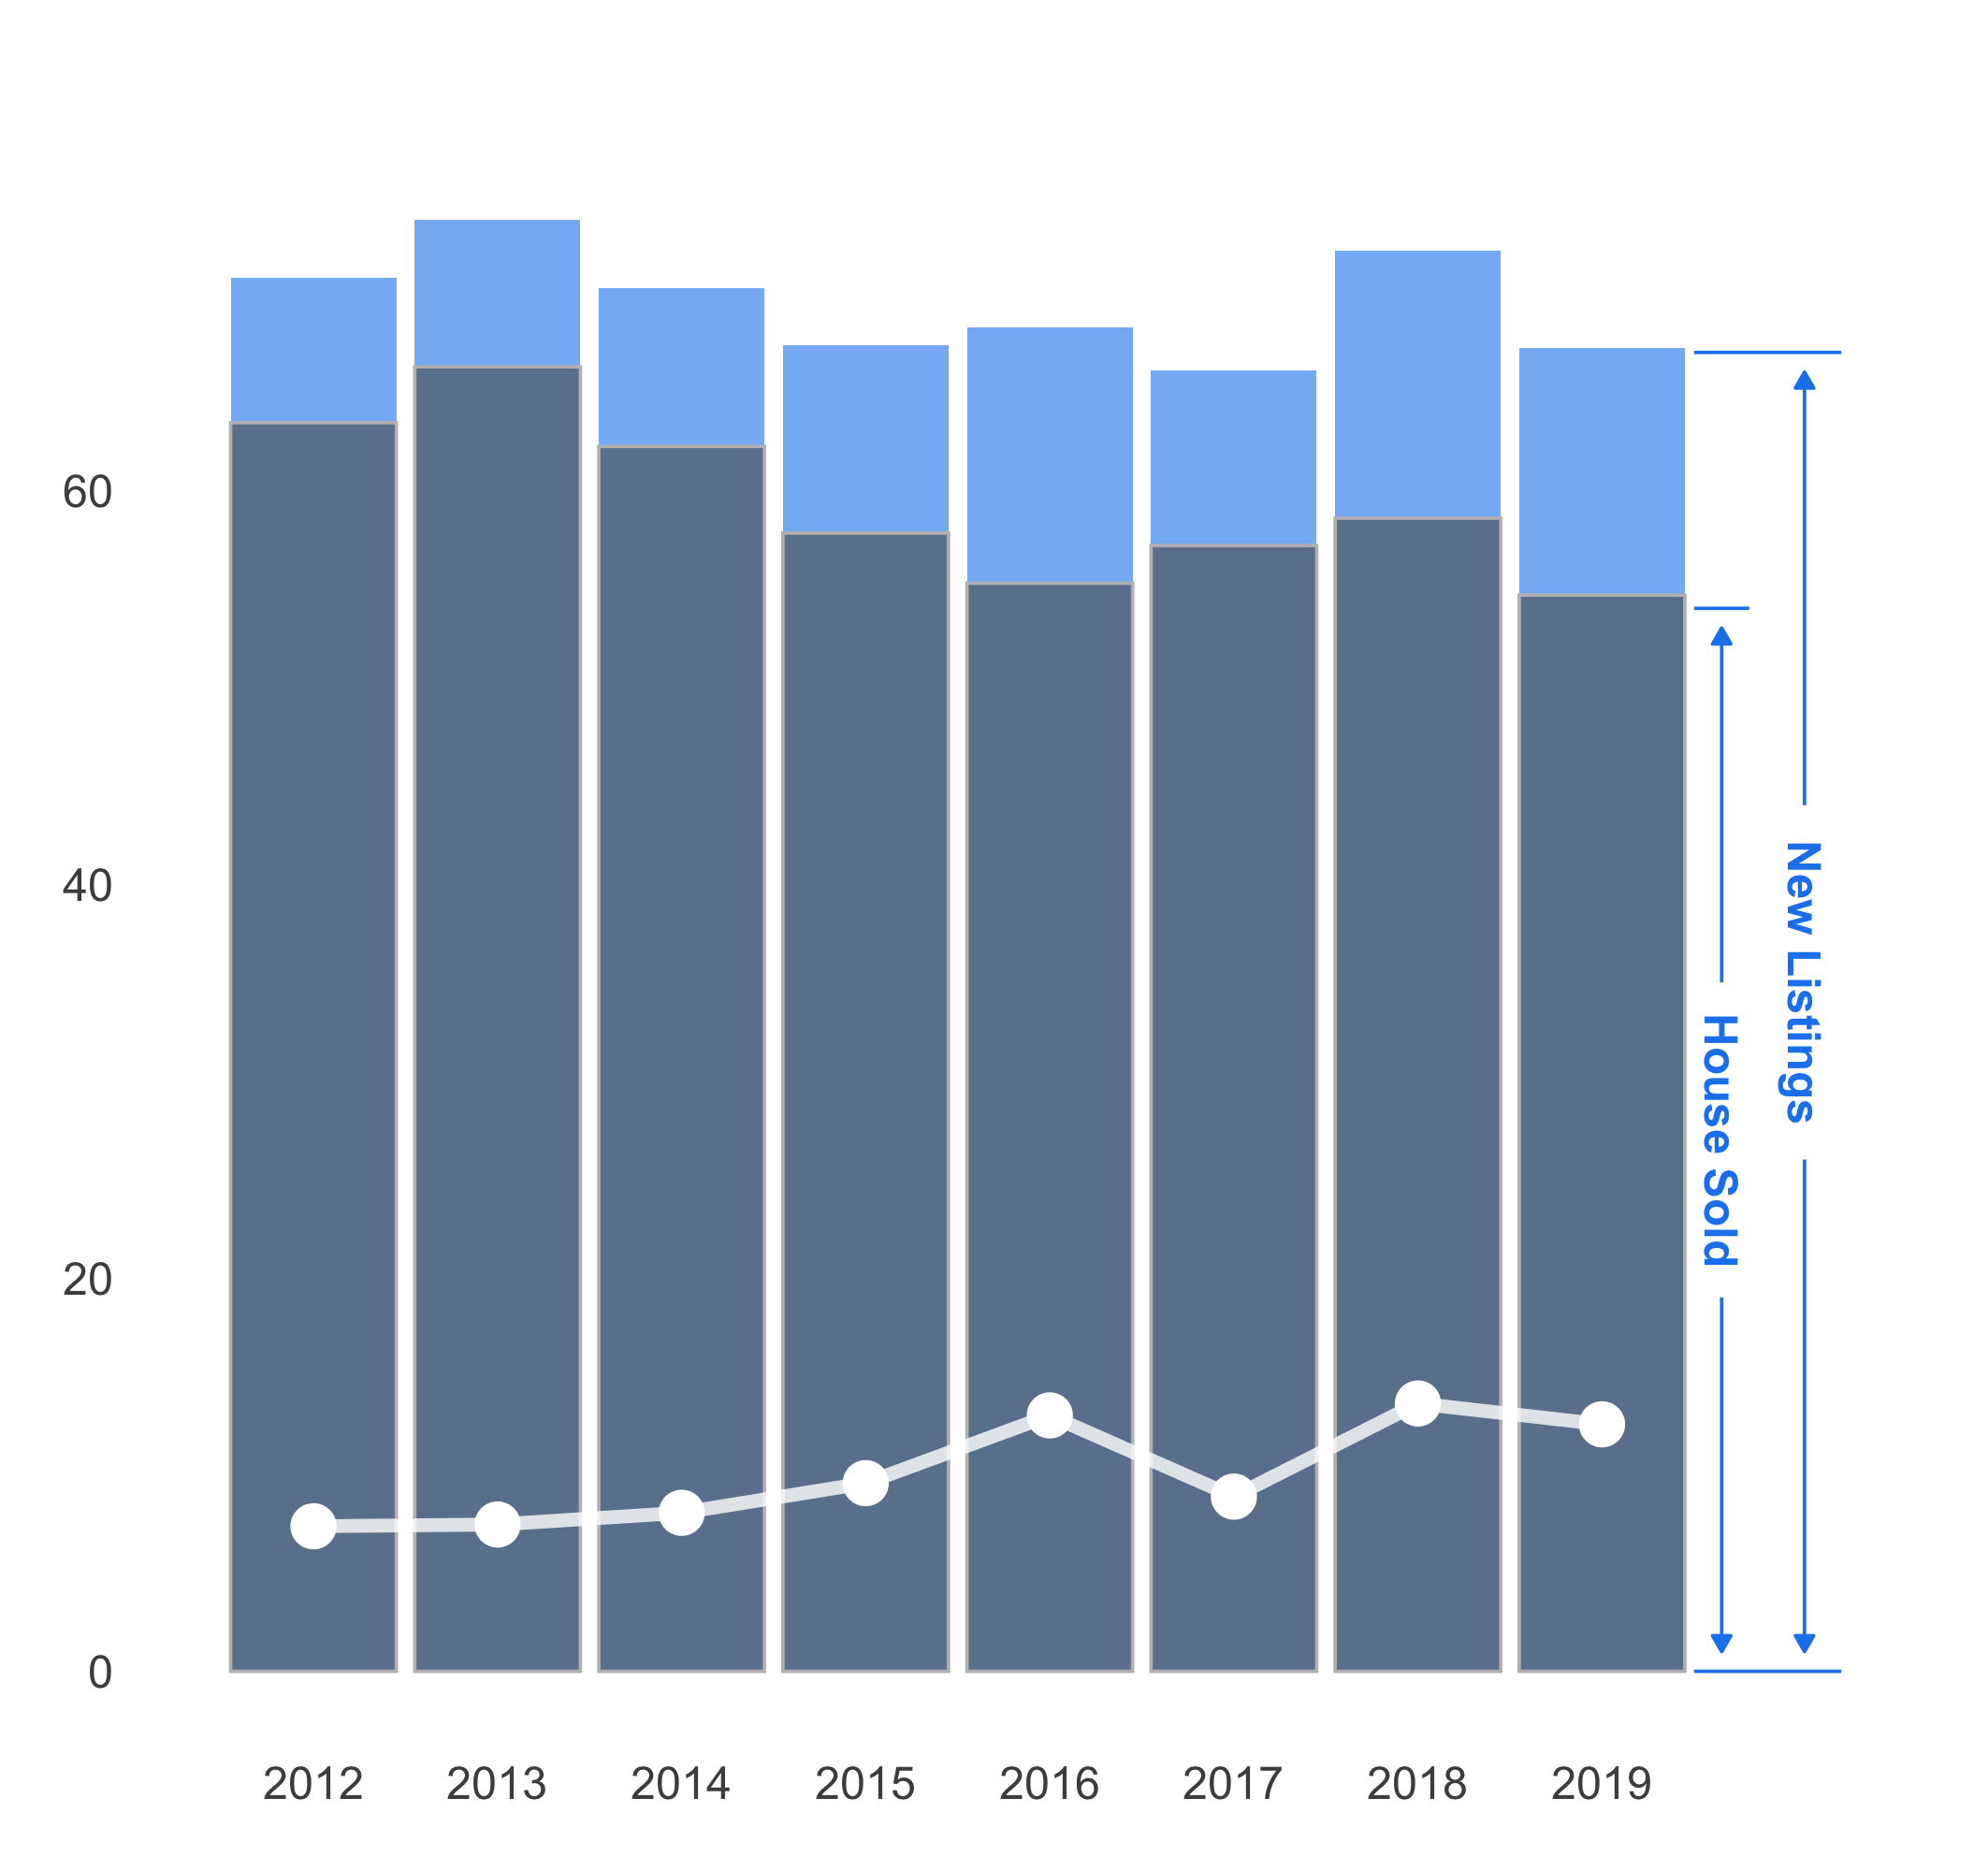

In [52]:
%%R -w 8.5 -h 8 --units in -r 250
ggplot()+geom_bar(aes(x=year,y=New.Listings),data=graph2,stat='identity',fill='dodgerblue2',alpha=0.6)+
geom_bar(aes(x=year,y=Homes.Sold),data=graph2,stat='identity',color='grey',alpha=0.6)+
geom_line(aes(x=year,y=-1*change),data=graph2,group=1,color='white',size=2,alpha=0.8)+
geom_point(aes(x=year,y=-1*change),data=graph2,color='white',size=6)+
ylab(' ')+theme_minimal()+theme(panel.grid = element_blank())+
xlab(' ')+
scale_y_continuous(limits=c(0,80),breaks=seq(0,60,20))+
expand_limits(x=c(0,10))+
geom_segment(aes(x=8.5,y=54,xend=8.8,yend=54),linetype=1,size=0.5,color='dodgerblue2')+
geom_segment(aes(x=8.5,y=0,xend=9.3,yend=0),linetype=1,size=0.5,color='dodgerblue2')+
geom_segment(aes(x=8.5,y=67,xend=9.3,yend=67),linetype=1,size=0.5,color='dodgerblue2')+
geom_segment(aes(x=8.65,y=19,xend=8.65,yend=1),linetype=1,size=0.5,color='dodgerblue2',arrow=arrow(length=unit(0.2,'cm'),type='closed'))+
geom_segment(aes(x=8.65,y=35,xend=8.65,yend=53),linetype=1,size=0.5,color='dodgerblue2',arrow=arrow(length=unit(0.2,'cm'),type='closed'))+
geom_text(aes(x=8.65,y=27),label='House Sold',color='dodgerblue2',fontface='bold',size=5,angle=270)+
geom_segment(aes(x=9.1,y=26,xend=9.1,yend=1),linetype=1,size=0.5,color='dodgerblue2',arrow=arrow(length=unit(0.2,'cm'),type='closed'))+
geom_segment(aes(x=9.1,y=44,xend=9.1,yend=66),linetype=1,size=0.5,color='dodgerblue2',arrow=arrow(length=unit(0.2,'cm'),type='closed'))+
geom_text(aes(x=9.1,y=35),label='New Listings',color='dodgerblue2',fontface='bold',size=5,angle=270)+
theme(axis.title=element_text(size=12,face="bold"),axis.text=element_text(size=14),panel.grid = element_blank(),panel.background = element_blank())
# ggsave('praph2.jpg')

### Trend of houses' days on market in SF in a year

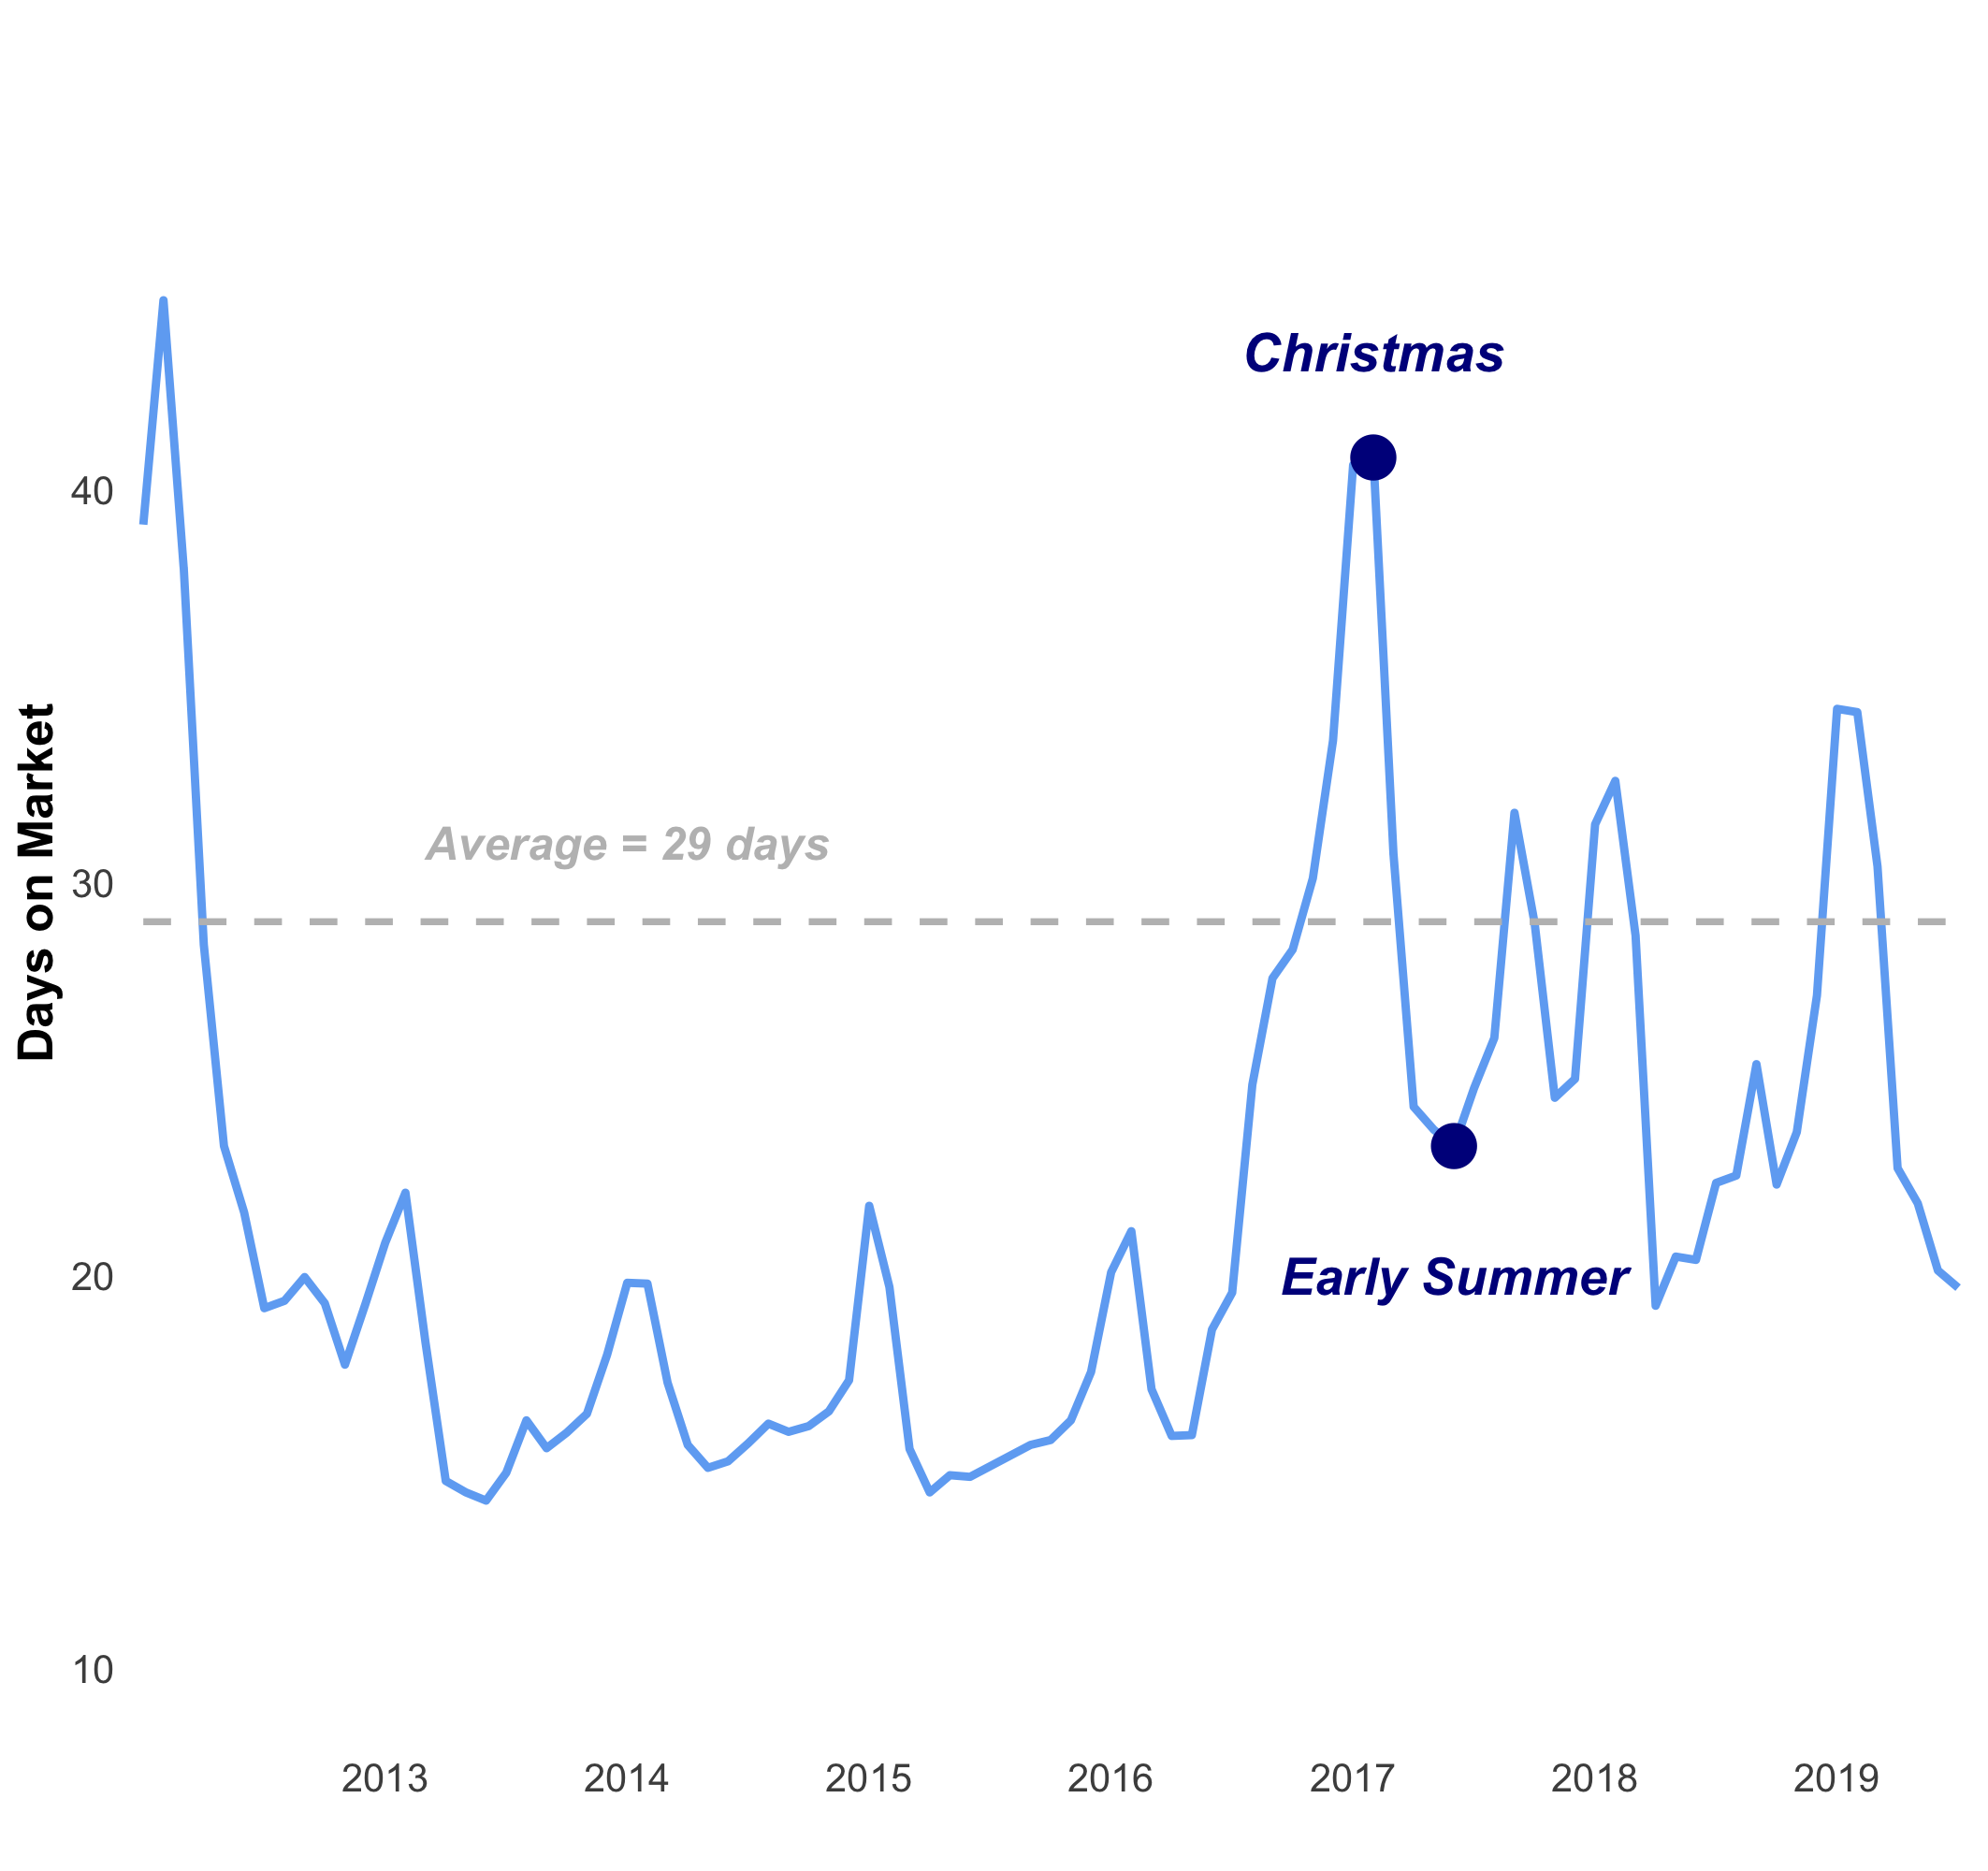

In [94]:
%%R -w 8.5 -h 8 --units in -r 250
ggplot()+
geom_line(aes(x=period,y=Days.on.Market),data=redfin1,group=1,color='dodgerblue2',size=1.2,alpha=0.7)+
theme_minimal()+
theme(panel.grid=element_blank())+xlab('')+
theme(axis.title=element_text(size=15,face="bold"),axis.text=element_text(size=12),panel.grid = element_blank(),panel.background = element_blank())+
scale_y_continuous(limits=c(10,50),breaks=seq(10,40,10))+
# add annotation
annotate('text',x='2017,02',y=43.5,label='Christmas',color='darkblue',size=5.8,fontface='bold.italic')+
annotate('text',x='2017,06',y=20,label='Early Summer',color='darkblue',size=5.6,fontface='bold.italic')+
ylab('Days on Market')+
# add two points on the peak and bottom in year 2017 to indicate seasonal fluctuation
geom_point(aes(x='2017,02',y=40.812500),size=6,color='darkblue')+
geom_point(aes(x='2017,06',y=23.291667),size=6,color='darkblue')+
scale_x_discrete(breaks=c('2013,01','2014,01','2015,01','2016,01','2017,01','2018,01','2019,01'),labels=c('2013','2014','2015','2016','2017','2018','2019'))+
# draw days on market average line
geom_segment(aes(x='2012,01',y=29,xend='2019,07',yend=29),linetype=2,color='grey',size=1)+
annotate('text',x='2014,01',y=31,label='Average = 29 days',color='grey',size=5,fontface='bold.italic')
# ggsave('graph3.jpg')

In [56]:
crime=pd.read_csv('crime_change.csv')
crime['base']=1
crime['final']=crime['base']+crime['crime_change']

In [57]:
crime1=crime[['zip','Year_x','base']]
crime2=crime[['zip','Year_y','final']]

In [60]:
crime_final=pd.concat([crime1,crime2],axis=0)

In [61]:
crime_final=crime_final.fillna(0)
crime_final['year']=crime_final['Year_x']+crime_final['Year_y']
crime_final['score']=crime_final['base']+crime_final['final']
crime_final=crime_final[['zip','year','score']]

In [64]:
price=pd.read_csv('price_zip.csv')

In [66]:
price['Month of Period End']=price['Month of Period End'].astype('str')
temp=price['Month of Period End'].str.split('-',expand=True)
price['year']=temp[1]

In [67]:
p94121=price[price.s=='Zip Code: 94121']
p94121=p94121.groupby('year').agg({'Median Sale Price':'mean'}).reset_index()
p94121=pd.DataFrame({'year':[16,18],'price':[1,1.207226]})

In [69]:
c94121=pd.DataFrame({'year':[16,18],'crime':[1,1.086881]})

In [70]:
%R -i c94121
%R -i p94121

### Trend of price (light blue) and crime rates (dark blue) in SF in different regions.

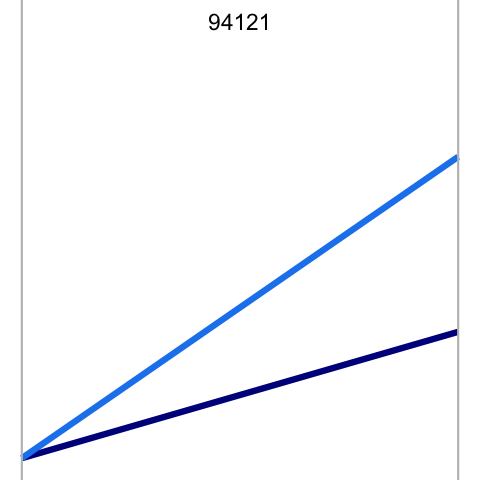

In [72]:
%%R
ggplot()+geom_line(stat='identity',data=c94121,aes(x=year,y=crime),color='darkblue',size=3)+
geom_line(stat='identity',aes(x=year,y=price),data=p94121,color='dodgerblue2',size=3)+theme_minimal()+
scale_x_continuous(limits=c(16,18),breaks=c(16,18))+
scale_y_continuous(label=scales::percent)+ylab('')+
geom_vline(xintercept = 16,color = "grey", size=1)+theme_void()+
geom_vline(xintercept = 18,color = "grey", size=1)+
annotate('text',x=17,y=1.3,label='94121',color='black',size=8)

In [73]:
c94117=pd.DataFrame({'year':[16,18],'crime':[1,1.096444781]})

In [74]:
p94117=price[price.s=='Zip Code: 94117']
p94117=p94117.groupby('year').agg({'Median Sale Price':'mean'}).reset_index()
p94117=pd.DataFrame({'year':[16,18],'price':[1,0.954597]})

In [75]:
%R -i c94117
%R -i p94117

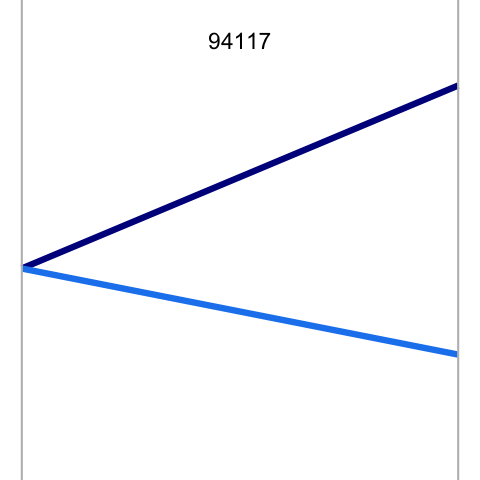

In [76]:
%%R
ggplot()+geom_line(stat='identity',data=c94117,aes(x=year,y=crime),color='darkblue',size=3)+
geom_line(stat='identity',aes(x=year,y=price),data=p94117,color='dodgerblue2',size=3)+theme_minimal()+
scale_x_continuous(limits=c(16,18),breaks=c(16,18))+
scale_y_continuous(label=scales::percent,limits=c(0.9,1.13))+ylab('')+
geom_vline(xintercept = 16,color = "grey", size=1)+theme_void()+
geom_vline(xintercept = 18,color = "grey", size=1)+
annotate('text',x=17,y=1.12,label='94117',color='black',size=8)

In [85]:
c94124=pd.DataFrame({'year':[16,18],'crime':[1,1.099704381]})

In [86]:
p94124=price[price.s=='Zip Code: 94124']
p94124=p94124.groupby('year').agg({'Median Sale Price':'mean'}).reset_index()
p94124=pd.DataFrame({'year':[16,18],'price':[1,1.161222]})

In [80]:
%R -i c94124
%R -i p94124

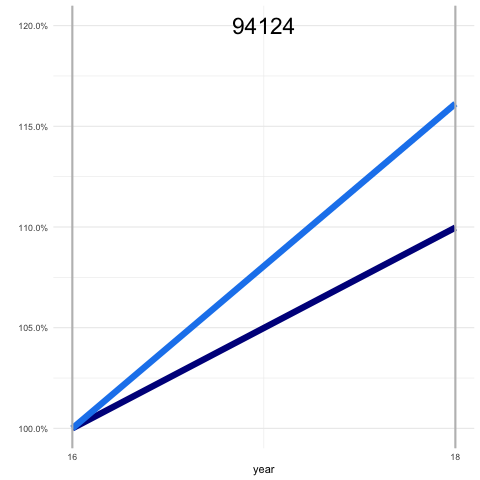

In [81]:
%%R
ggplot()+geom_line(stat='identity',data=c94124,aes(x=year,y=crime),color='darkblue',size=3)+
geom_line(stat='identity',aes(x=year,y=price),data=p94124,color='dodgerblue2',size=3)+theme_minimal()+
scale_x_continuous(limits=c(16,18),breaks=c(16,18))+
scale_y_continuous(label=scales::percent,limits=c(1,1.2))+ylab('')+
geom_vline(xintercept = 16,color = "grey", size=1)+
geom_vline(xintercept = 18,color = "grey", size=1)+
annotate('text',x=17,y=1.2,label='94124',color='black',size=8)

In [82]:
c94122=pd.DataFrame({'year':[16,18],'crime':[1,1.101779359]})

In [88]:
price18=price.loc[price.year=='18']
price18=price18.groupby('s').agg({'Median Sale Price':'mean'}).reset_index()

In [90]:
total=pd.read_csv('total.csv')
total=total.loc[total['Month of Period End'].str.endswith('18')]
total['Median Sale Price']=total['Median Sale Price'].astype('float')
total=total.groupby('Region').agg({'Median Sale Price':'mean'}).reset_index()
temp=total['Region'].str.split(': ',expand=True)
total['zip']=temp[1]
total['zip']=total['zip'].astype('int64')

In [91]:
final=pd.merge(crime,total,how='outer',on='zip')
final1=final[['zip','Category_y','Median Sale Price']]

In [92]:
%R -i final1

### Correlation between house median price and crime rate in SF

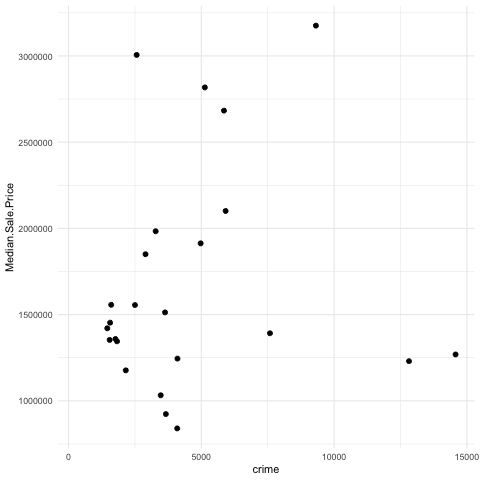

In [93]:
%%R
ggplot()+geom_point(aes(x=Category_y,y=Median.Sale.Price),data=final1,size=2)+xlab('crime')+theme_minimal()

### Crime scatter plot against housing price from period 2013 - 2018

In [129]:
table=pd.read_csv('2013to2018.csv')

In [130]:
table=table.drop(columns=['Unnamed: 0','index','IncidntNum','Category','lat','lon','Date','PdDistrict'])
table['count'] = 1
table1=table.groupby(['Year','zip']).agg({'count':'count'}).reset_index()

In [131]:
total=pd.read_csv('/Users/cjq/Documents/EDA project/total.csv')

In [132]:
total['Year']=total['Month of Period End'].str.split('-',expand=True)[1]
total = total.drop(index=1841)
total['Median Sale Price']=total['Median Sale Price'].fillna(0)
total['Median Sale Price']=total['Median Sale Price'].astype('float32')
total=total.groupby(['Region','Year']).agg({'Median Sale Price':'mean'}).reset_index()
total['zip']=total['Region'].str.split(':',expand=True)[1]
total['Year']=total['Year'].astype('int64')
total=total.drop(columns=['Region'])
total['Year']=total['Year']+2000
# total=total.drop(columns='Region')
total.columns=['Year','Median Sale Price','zip']
total['zip']=total['zip'].astype('int64')

In [134]:
final=pd.merge(total,table1,how='outer',on=['Year','zip'])

In [135]:
final1=final.dropna()
final1['Median Sale Price']=final1['Median Sale Price']/1000

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [136]:
%load_ext rpy2.ipython
%R library(ggplot2)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


array(['grid', 'ggplot2', 'tools', 'stats', 'graphics', 'grDevices',
       'utils', 'datasets', 'methods', 'base'], dtype='<U9')

In [137]:
%R -i final1

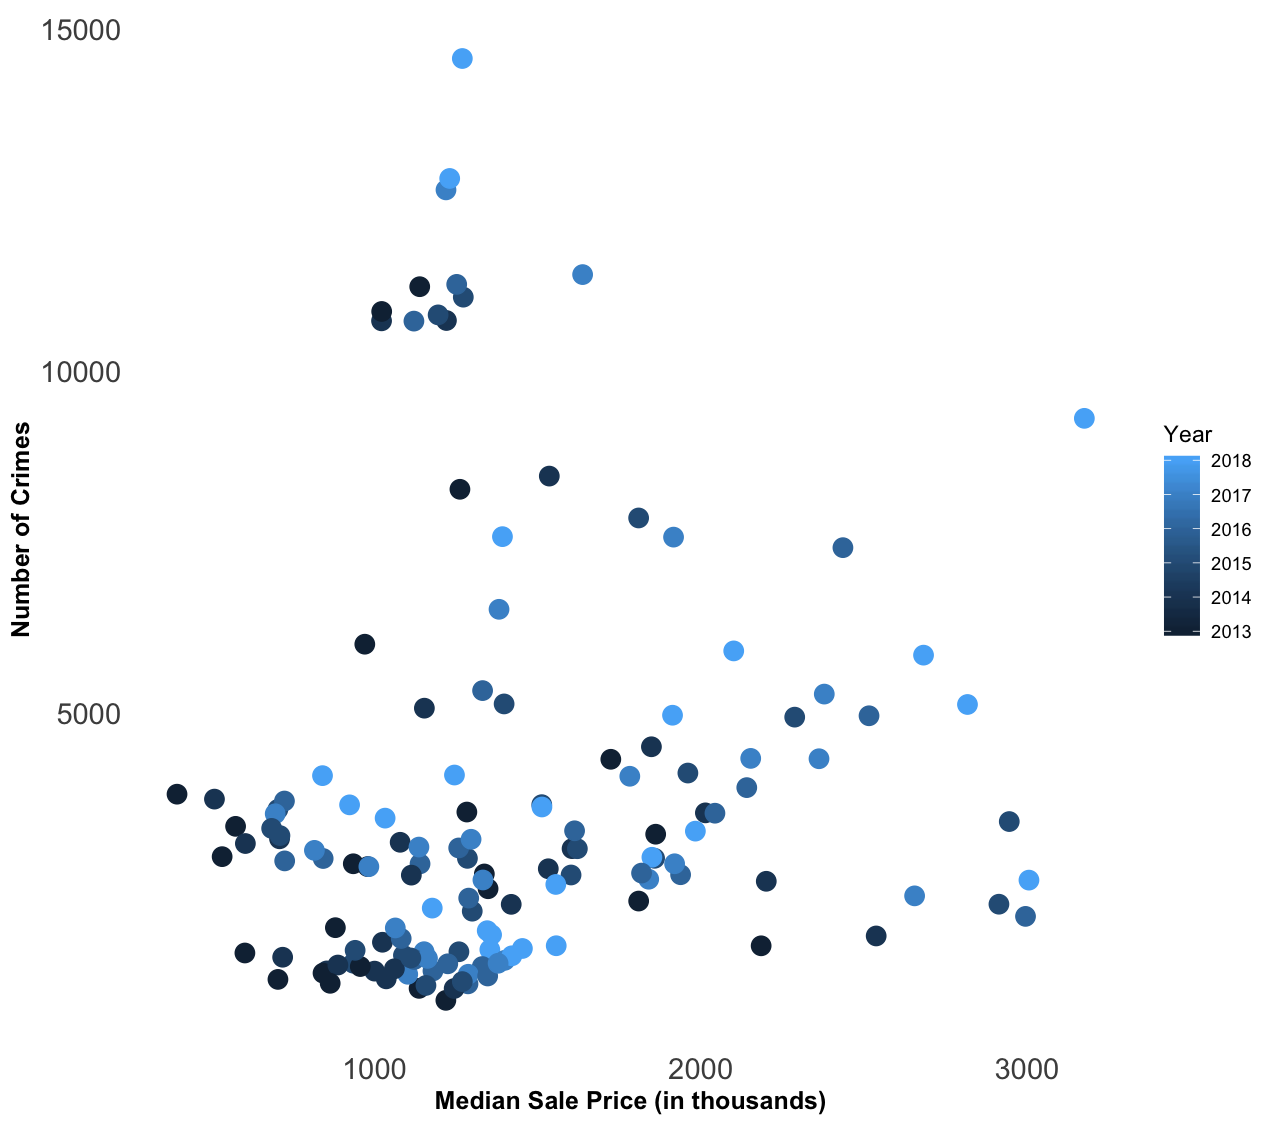

In [141]:
%%R -w 8.5 -h 7.5 --units in -r 150
ggplot()+geom_point(aes(x=Median.Sale.Price,y=count,color=Year),data=final1,size=4)+
theme_minimal()+theme(panel.grid=element_blank())+
theme(axis.title=element_text(size=12,face="bold"),axis.text=element_text(size=14),panel.grid = element_blank(),panel.background = element_blank())+
xlab('Median Sale Price (in thousands)')+ylab('Number of Crimes')
# ggsave('scatter.jpg')